Data sets:

PISA-test results:
https://ourworldindata.org/grapher/pisa-test-score-mean-performance-on-the-science-scale
GDP per capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
Education index:
http://hdr.undp.org/en/content/education-index
Primary school enrollment:
https://data.worldbank.org/indicator/SE.PRM.NENR
GDP to education:
https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS
Upper secondary graduation rate:
https://data.oecd.org/students/secondary-graduation-rate.htm
Average years of schooling:
https://ourworldindata.org/global-education
Population:
https://data.worldbank.org/indicator/SP.POP.TOTL
Life expectancy:
https://data.worldbank.org/indicator/SP.DYN.LE00.IN

In [1]:
#Importing packages
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn import linear_model
import scipy.stats

In [2]:
#Creating dataframes
df_read = pd.read_csv('pisa_read.csv')
df_math = pd.read_csv('pisa_math.csv')
df_science = pd.read_csv('pisa_science.csv')
countryCodes = pd.read_csv('ISOCodes.csv')

In [3]:
#PISA-reading scores
df_read.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAREAD,BOY,MEANSCORE,A,2000,513.0,NaN
1,AUS,PISAREAD,BOY,MEANSCORE,A,2003,506.0,NaN
2,AUS,PISAREAD,BOY,MEANSCORE,A,2006,495.0,NaN


In [4]:
#PISA-math scores
df_math.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAMATH,BOY,MEANSCORE,A,2003,527.0,NaN
1,AUS,PISAMATH,BOY,MEANSCORE,A,2006,527.0,NaN
2,AUS,PISAMATH,BOY,MEANSCORE,A,2009,519.0,NaN


In [5]:
#PISA-science scores
df_science.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISASCIENCE,BOY,MEANSCORE,A,2006,527.000,NaN
1,AUS,PISASCIENCE,BOY,MEANSCORE,A,2009,527.000,NaN
2,AUS,PISASCIENCE,BOY,MEANSCORE,A,2012,523.728,NaN


In [6]:
#PISA-test countries in reading
df_read = df_read.sort_values('LOCATION')
print(df_read['LOCATION'].unique())

['AUS' 'AUT' 'BEL' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CZE' 'DEU' 'DNK'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG' 'HUN' 'IDN' 'IRL' 'ISL' 'ISR'
 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MAC' 'MEX' 'NLD' 'NOR' 'NZL' 'OAVG'
 'PER' 'POL' 'PRT' 'RUS' 'SGP' 'SVK' 'SVN' 'SWE' 'TUR' 'TWN' 'USA']


In [7]:
#PISA-test countries in math
df_math = df_math.sort_values('LOCATION')
print(df_math['LOCATION'].unique()) 

['AUS' 'AUT' 'BEL' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CZE' 'DEU' 'DNK'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG' 'HUN' 'IDN' 'IRL' 'ISL' 'ISR'
 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MAC' 'MEX' 'NLD' 'NOR' 'NZL' 'OAVG'
 'PER' 'POL' 'PRT' 'RUS' 'SGP' 'SVK' 'SVN' 'SWE' 'TUR' 'TWN' 'USA']


In [8]:
#PISA-test countries in science
df_science = df_science.sort_values('LOCATION')
print(df_science['LOCATION'].unique())

['AUS' 'AUT' 'BEL' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CZE' 'DEU' 'DNK'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG' 'HUN' 'IDN' 'IRL' 'ISL' 'ISR'
 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MAC' 'MEX' 'NLD' 'NOR' 'NZL' 'OAVG'
 'PER' 'POL' 'PRT' 'RUS' 'SGP' 'SVK' 'SVN' 'SWE' 'TUR' 'TWN' 'USA']


In [9]:
#Unique years per test
print(df_read['TIME'].unique())
print(df_math['TIME'].unique())
print(df_science['TIME'].unique())

[2000 2018 2015 2012 2009 2006 2003]
[2003 2009 2012 2015 2018 2006]
[2006 2012 2015 2018 2009]


In [10]:
#Creating average values per country
df_read['Value'] = df_read['Value'].fillna(df_read.groupby('LOCATION')['Value'].transform('mean'))
df_math['Value'] = df_math['Value'].fillna(df_math.groupby('LOCATION')['Value'].transform('mean'))
df_science['Value'] = df_science['Value'].fillna(df_science.groupby('LOCATION')['Value'].transform('mean'))

In [11]:
#Drop unnecessary columns
df_read = df_read.drop(columns=['MEASURE','FREQUENCY','Flag Codes'])
df_math = df_math.drop(columns=['MEASURE','FREQUENCY','Flag Codes'])
df_science = df_science.drop(columns=['MEASURE','FREQUENCY','Flag Codes'])

In [12]:
#Rename columns
df_read=df_read.rename(columns={"LOCATION": "Country", "SUBJECT": "Gender", "Value": "Score", "TIME":"Year"})
df_math=df_math.rename(columns={"LOCATION": "Country", "SUBJECT": "Gender", "Value": "Score", "TIME":"Year"})
df_science=df_science.rename(columns={"LOCATION": "Country", "SUBJECT": "Gender", "Value": "Score", "TIME":"Year"})

In [13]:
#New df of all dataframes concatenated
df_concat=pd.concat([df_read,df_math,df_science])
df_concat['mean']=df_concat.groupby(['Country'])['Score'].transform('mean')
df_concat3=pd.concat([df_science,df_read,df_math])

In [14]:
df_read2 = df_read.copy()
df_math2 = df_math.copy()
df_science2 = df_science.copy()

In [15]:
#Renaming columns
df_read2=df_read2.rename(columns={"Score":"ReadingScore"})
df_math2=df_math2.rename(columns={"Score":"MathScore"})
df_science2=df_science2.rename(columns={"Score":"ScienceScore"})

In [16]:
#Drop columns
df_read2 = df_read2.drop(columns=['INDICATOR'])
df_math2 = df_math2.drop(columns=['INDICATOR'])
df_science2 = df_science2.drop(columns=['INDICATOR'])

In [17]:
df_all = df_read2.merge(df_math2, on=['Country','Gender','Year'])

In [18]:
df_all = df_all.merge(df_science2, on=['Country','Gender','Year'])

In [19]:
#New df with all test scores from 2006 til 2018
df_all.head()

,Country,Gender,Year,ReadingScore,MathScore,ScienceScore
0,AUS,TOT,2018,503.0,491.0,503.0
1,AUS,TOT,2015,503.0,494.0,510.0
2,AUS,TOT,2012,512.0,504.0,521.0
3,AUS,TOT,2009,515.0,514.0,527.0
4,AUS,TOT,2006,513.0,520.0,527.0


In [20]:
#Replacing 0 values with Nan
df_all.replace(0, np.nan, inplace=True)

In [21]:
#No missing values
df_all.isnull().sum()

Country         0
Gender          0
Year            0
ReadingScore    0
MathScore       0
ScienceScore    0
dtype: int64

In [22]:
#New df with total results (avg of boys' and girls' results)
df_all_total = df_all[df_all["Gender"] == "TOT"]

In [23]:
df_all_total["Country"].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
       'HKG', 'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR',
       'LTU', 'LUX', 'LVA', 'MAC', 'MEX', 'NLD', 'NOR', 'NZL', 'OAVG',
       'PER', 'POL', 'PRT', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR',
       'TWN', 'USA'], dtype=object)

In [24]:
country_list=['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
       'HKG', 'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR',
       'LTU', 'LUX', 'LVA', 'MAC', 'MEX', 'NLD', 'NOR', 'NZL', 'OAVG',
       'PER', 'POL', 'PRT', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR',
       'TWN', 'USA']

In [25]:
df_all_total["Year"].unique()

array([2018, 2015, 2012, 2009, 2006], dtype=int64)

In [26]:
df_all_total.groupby('Year').nunique()

,Country,Gender,ReadingScore,MathScore,ScienceScore
Year,,,,,
2006,37,1,30,33,35
2009,37,1,30,33,35
2012,39,1,29,34,36
2015,44,1,35,36,34
2018,42,1,33,35,36


In [27]:
#Df for girls' reuslts only
df_all_girl = df_all[df_all["Gender"] == "GIRL"]

In [28]:
#Df for boys' results only
df_all_boy = df_all[df_all["Gender"] == "BOY"]

In [29]:
df2015=df_all_total[df_all_total['Year']==2015]

In [30]:
df2006=df_all_total.copy()
df2006=df2006[df2006['Year']==2006]

In [31]:
df2018=df_all_total.copy()
df2018=df2018[df2018['Year']==2018]

In [32]:
df2015['Country'].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CZE',
       'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG',
       'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX',
       'LVA', 'MAC', 'MEX', 'NLD', 'NOR', 'NZL', 'OAVG', 'PER', 'POL',
       'PRT', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'USA'],
      dtype=object)

In [33]:
df2006['Country'].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU',
       'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IDN',
       'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'LVA', 'MEX',
       'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE',
       'TUR'], dtype=object)

In [34]:
df2015['Country'].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CZE',
       'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG',
       'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX',
       'LVA', 'MAC', 'MEX', 'NLD', 'NOR', 'NZL', 'OAVG', 'PER', 'POL',
       'PRT', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'USA'],
      dtype=object)

In [35]:
df_concat.head()

,Country,INDICATOR,Gender,Year,Score,mean
0,AUS,PISAREAD,BOY,2000,513.0,513.137407
20,AUS,PISAREAD,TOT,2018,503.0,513.137407
19,AUS,PISAREAD,TOT,2015,503.0,513.137407
18,AUS,PISAREAD,TOT,2012,512.0,513.137407
17,AUS,PISAREAD,TOT,2009,515.0,513.137407


In [36]:
df_concat2015=df_concat[df_concat['Year']==2015]

In [37]:
df_concat2015 = df_concat2015.sort_values('mean', ascending = False)

In [38]:
df_concat2015['Country'].unique()

array(['SGP', 'FIN', 'KOR', 'HKG', 'MAC', 'JPN', 'CAN', 'TWN', 'EST',
       'NZL', 'NLD', 'AUS', 'CHE', 'IRL', 'BEL', 'DEU', 'POL', 'SVN',
       'GBR', 'DNK', 'SWE', 'NOR', 'FRA', 'AUT', 'CZE', 'OAVG', 'USA',
       'ISL', 'LVA', 'HUN', 'ESP', 'PRT', 'LUX', 'ITA', 'SVK', 'RUS',
       'GRC', 'ISR', 'TUR', 'CHL', 'MEX', 'COL', 'BRA', 'PER', 'IDN'],
      dtype=object)

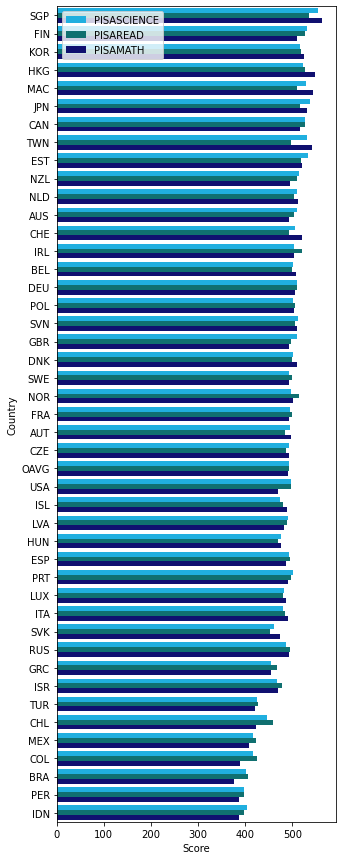

In [39]:
plt.figure(figsize=(5,15))
colors = ["deepskyblue","teal","navy"]
sns.barplot(x='Score',y='Country',data=df_concat2015,hue='INDICATOR',palette=colors,orient = 'h',ci=None)
plt.legend(loc=2);
#plt.yticks(rotation=90);
#order=df_change.sort_values('ScienceChangePercent')

In [40]:
df_total_avg=df_all_total.copy()

In [41]:
df_total_avg['ReadingScoreAvg'] = df_all_total.groupby(['Year'])['ReadingScore'].transform('mean')
df_total_avg['MathScoreAvg'] = df_all_total.groupby(['Year'])['MathScore'].transform('mean')
df_total_avg['ScienceScoreAvg'] = df_all_total.groupby(['Year'])['ScienceScore'].transform('mean')

In [42]:
df_total_avg=df_total_avg.drop_duplicates(subset=['Year'])
df_total_avg=df_total_avg.sort_values(by=['Year'])

In [43]:
df_total_avg.head(100)

,Country,Gender,Year,ReadingScore,MathScore,ScienceScore,ReadingScoreAvg,MathScoreAvg,ScienceScoreAvg
4,AUS,TOT,2006,513.0,520.0,527.0,482.189189,487.837838,491.945946
3,AUS,TOT,2009,515.0,514.0,527.0,488.135135,488.216216,494.648649
2,AUS,TOT,2012,512.0,504.0,521.0,490.820513,487.923077,495.128205
1,AUS,TOT,2015,503.0,494.0,510.0,487.000000,486.045455,488.931818
0,AUS,TOT,2018,503.0,491.0,503.0,480.809524,481.928571,482.428571


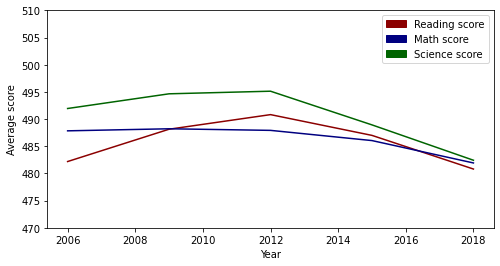

In [44]:
plt.figure(figsize=(8,4))
ax1=sns.lineplot(x='Year',y='ReadingScoreAvg',data=df_total_avg,ci=None,color='darkred')
sns.lineplot(x='Year',y='MathScoreAvg',data=df_total_avg,ci=None,color='navy')
sns.lineplot(x='Year',y='ScienceScoreAvg',data=df_total_avg,ci=None,color='darkgreen')
ax1.set_ylim([470,510])

red_patch = mpatches.Patch(color='darkred', label='Reading score')
blue_patch = mpatches.Patch(color='navy', label='Math score')
green_patch = mpatches.Patch(color='darkgreen', label='Science score')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Year')
plt.ylabel('Average score');

<h3>Change</h3>

In [45]:
df_change=df2006.merge(df2018, on='Country',how='left')

In [46]:
df2006.nunique()

Country         37
Gender           1
Year             1
ReadingScore    30
MathScore       33
ScienceScore    35
dtype: int64

In [47]:
df2018.nunique()

Country         42
Gender           1
Year             1
ReadingScore    33
MathScore       35
ScienceScore    36
dtype: int64

In [48]:
df_change.head()

,Country,Gender_x,Year_x,ReadingScore_x,MathScore_x,ScienceScore_x,Gender_y,Year_y,ReadingScore_y,MathScore_y,ScienceScore_y
0,AUS,TOT,2006,513.0,520.0,527.0,TOT,2018,503.0,491.0,503.0
1,AUT,TOT,2006,490.0,505.0,511.0,TOT,2018,484.0,499.0,490.0
2,BEL,TOT,2006,501.0,520.0,510.0,TOT,2018,493.0,508.0,499.0
3,BRA,TOT,2006,393.0,370.0,390.0,TOT,2018,413.0,384.0,404.0
4,CAN,TOT,2006,527.0,527.0,534.0,TOT,2018,520.0,512.0,518.0


In [49]:
df2018.isnull().sum()

Country         0
Gender          0
Year            0
ReadingScore    0
MathScore       0
ScienceScore    0
dtype: int64

In [50]:
df_change['Country'].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU',
       'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IDN',
       'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'LVA', 'MEX',
       'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE',
       'TUR'], dtype=object)

In [51]:
df_change['ReadingChange'] = df_change['ReadingScore_y'] - df_change['ReadingScore_x']
df_change['MathChange'] = df_change['MathScore_y'] - df_change['MathScore_x']
df_change['ScienceChange'] = df_change['ScienceScore_y'] - df_change['ScienceScore_x']

In [52]:
df_change['ReadChangePercent'] = df_change['ReadingChange'] / df_change['ReadingScore_x']*100
df_change['MathChangePercent'] = df_change['MathChange'] / df_change['MathScore_x']*100
df_change['ScienceChangePercent'] = df_change['ScienceChange'] / df_change['ScienceScore_x']*100

In [53]:
df_change.columns

Index(['Country', 'Gender_x', 'Year_x', 'ReadingScore_x', 'MathScore_x',
       'ScienceScore_x', 'Gender_y', 'Year_y', 'ReadingScore_y', 'MathScore_y',
       'ScienceScore_y', 'ReadingChange', 'MathChange', 'ScienceChange',
       'ReadChangePercent', 'MathChangePercent', 'ScienceChangePercent'],
      dtype='object')

In [54]:
df_change['Country'].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU',
       'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IDN',
       'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'LVA', 'MEX',
       'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE',
       'TUR'], dtype=object)

In [55]:
df_change.drop(columns=['Gender_x', 'Year_x', 'ReadingScore_x', 'MathScore_x',
       'ScienceScore_x', 'Gender_y', 'Year_y', 'ReadingScore_y', 'MathScore_y',
       'ScienceScore_y'],inplace=True)

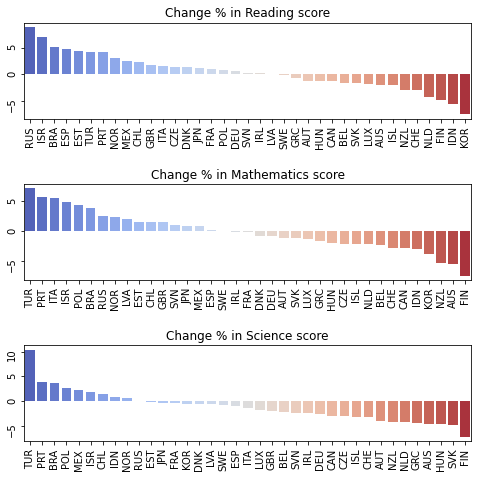

In [56]:
fig, axes= plt.subplots(3,1, figsize=(7,7))
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.9   # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.9
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

readingplot=sns.barplot(ax= axes[0],x='Country',y='ReadChangePercent',data=df_change,order=df_change.sort_values('ReadChangePercent', ascending=False).Country,palette="coolwarm")
#for p in readingplot.patches:
 #   readingplot.annotate(format(p.get_height(), '.1f'), 
  #                 (p.get_x() + p.get_width() / 2., p.get_height()), 
  ##                ha = 'center', va = 'center', 
  #                 xytext = (0, 9), 
  #                 textcoords = 'offset points')
axes[0].set_ylabel('')
axes[0].set_xlabel('')

mathplot=sns.barplot(ax= axes[1], x='Country',y='MathChangePercent',data=df_change,order=df_change.sort_values('MathChangePercent', ascending=False).Country,palette="coolwarm")
axes[1].set_ylabel('')
axes[1].set_xlabel('')

scienceplot=sns.barplot(ax=axes[2],x='Country',y='ScienceChangePercent',data=df_change,order=df_change.sort_values('ScienceChangePercent', ascending=False).Country,palette="coolwarm")
axes[2].set_ylabel('')
axes[2].set_xlabel('')

axes[0].set_title('Change % in Reading score')
axes[1].set_title('Change % in Mathematics score')
axes[2].set_title('Change % in Science score')

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)

fig.tight_layout(pad=2.0)

In [57]:
df_change.head()

,Country,ReadingChange,MathChange,ScienceChange,ReadChangePercent,MathChangePercent,ScienceChangePercent
0,AUS,-10.0,-29.0,-24.0,-1.949318,-5.576923,-4.554080
1,AUT,-6.0,-6.0,-21.0,-1.224490,-1.188119,-4.109589
2,BEL,-8.0,-12.0,-11.0,-1.596806,-2.307692,-2.156863
3,BRA,20.0,14.0,14.0,5.089059,3.783784,3.589744
4,CAN,-7.0,-15.0,-16.0,-1.328273,-2.846300,-2.996255


<h4>Education per GDP</h4>

In [58]:
edu_gdp=pd.read_excel('Years.xlsx')

In [59]:
edu_gdp.head()

,Country,Code,Year,Value
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [60]:
edu_gdp = edu_gdp[edu_gdp['Code'].isin(country_list)]

In [61]:
edu_gdp.replace(0, np.nan, inplace=True)

In [62]:
edu_gdp['Value'].isnull().groupby(edu_gdp['Year']).sum()

Year
2000    11
2001     7
2002     7
2003     9
2004     8
2005     8
2006     9
2007     8
2008     6
2009     8
2010     7
2011     7
2012     9
2013     6
2014     6
2015     9
2016    10
2017     7
2018    40
2019    42
2020    45
Name: Value, dtype: int64

In [63]:
edu_gdp = edu_gdp[edu_gdp['Year']<= 2018]

In [64]:
edu_gdp_2015=edu_gdp[edu_gdp['Year']==2015]

In [65]:
edu_gdp_avg=edu_gdp.copy()

In [66]:
edu_gdp_avg['avgPercent']=edu_gdp_avg.groupby(['Country'])['Value'].transform('mean')

In [67]:
edu_gdp_avg=edu_gdp_avg.drop_duplicates(subset=['Country'])

In [68]:
edu_gdp_avg.reset_index(inplace=True)

In [69]:
edu_gdp_avg['Value'].isnull().groupby(edu_gdp_avg['Year']).sum()

Year
2000    11
Name: Value, dtype: int64

In [70]:
edu_gdp_avg['Value'].isnull().groupby(edu_gdp_avg['Country']).sum()

Country
Australia               0
Austria                 0
Belgium                 1
Brazil                  0
Canada                  0
Chile                   0
Colombia                0
Costa Rica              0
Czech Republic          0
Denmark                 0
Estonia                 0
Finland                 0
France                  1
Germany                 1
Greece                  0
Hong Kong SAR, China    1
Hungary                 0
Iceland                 0
Indonesia               1
Ireland                 0
Israel                  0
Italy                   0
Japan                   0
Korea, Rep.             1
Latvia                  0
Lithuania               1
Luxembourg              1
Macao SAR, China        0
Mexico                  0
Netherlands             0
New Zealand             1
Norway                  0
Peru                    0
Poland                  0
Portugal                0
Russian Federation      0
Singapore               0
Slovak Republic         0
Slov

In [71]:
edu_gdp_avg.drop(columns=['Year','Value','index'],inplace=True)

In [72]:
edu_gdp_avg.head()

,Country,Code,avgPercent
0,Australia,AUS,5.038344
1,Austria,AUT,5.446363
2,Belgium,BEL,6.400587
3,Brazil,BRA,5.204769
4,Canada,CAN,5.013341


<h4>GDP</h4>

In [73]:
gdp_df = pd.read_excel('GDP.xlsx')
sec_school_m=pd.read_excel('male.xlsx')
sec_school_f=pd.read_excel('female.xlsx')

In [74]:
gdp_df.head()

,Country,Code,Year,GDP
0,Aruba,ABW,2000,32031.555426
1,Afghanistan,AFG,2000,0.000000
2,Angola,AGO,2000,3275.128628
3,Albania,ALB,2000,3862.272050
4,Andorra,AND,2000,0.000000


In [75]:
gdp_df.replace(0, np.nan, inplace=True)
sec_school_m.replace(0, np.nan, inplace=True)
sec_school_f.replace(0, np.nan, inplace=True)

In [76]:
sec_school_m.shape

(5544, 4)

In [77]:
sec_school_m.isnull().sum()

Country                    0
Code                       0
Year                       0
low_sec_compl_rate_f    2821
dtype: int64

In [78]:
sec_school_m = sec_school_m[sec_school_m['Code'].isin(country_list)]
gdp_df = gdp_df[gdp_df['Code'].isin(country_list)]
sec_school_f = sec_school_f[sec_school_f['Code'].isin(country_list)]

In [79]:
sec_school_m.head()

,Country,Code,Year,low_sec_compl_rate_f
11,Australia,AUS,2000,NaN
12,Austria,AUT,2000,88.73173
15,Belgium,BEL,2000,92.18191
27,Brazil,BRA,2000,NaN
33,Canada,CAN,2000,NaN


In [80]:
sec_school_m.rename(columns={'low_sec_compl_rate_f':'low_sec_compl_rate_m'}, inplace=True)

In [81]:
sec_school_m['low_sec_compl_rate_m'].isnull().groupby(sec_school_m['Year']).sum()

Year
2000    18
2001    17
2002    12
2003    14
2004    13
2005    11
2006    12
2007    12
2008    14
2009    13
2010    11
2011    10
2012     8
2013     5
2014     6
2015     5
2016     7
2017     5
2018    39
2019    45
2020    45
Name: low_sec_compl_rate_m, dtype: int64

In [82]:
sec_school_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 11 to 5529
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               945 non-null    object 
 1   Code                  945 non-null    object 
 2   Year                  945 non-null    int64  
 3   low_sec_compl_rate_m  623 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 69.2+ KB


In [83]:
sec_school_compl_df = sec_school_m.merge(sec_school_f,on=['Country','Year','Code'], how='inner')

In [84]:
sec_school_compl_df=sec_school_compl_df[sec_school_compl_df['Year']<=2018]

In [85]:
sec_school_compl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 854
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               855 non-null    object 
 1   Code                  855 non-null    object 
 2   Year                  855 non-null    int64  
 3   low_sec_compl_rate_m  623 non-null    float64
 4   low_sec_compl_rate_f  772 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 40.1+ KB


In [86]:
sec_school_compl_df['low_sec_compl_rate_m'].isnull().groupby(sec_school_compl_df['Country']).sum()

Country
Australia               16
Austria                  2
Belgium                  1
Brazil                  10
Canada                  13
Chile                    8
Colombia                 5
Costa Rica              11
Czech Republic          11
Denmark                  1
Estonia                  1
Finland                  1
France                   1
Germany                  3
Greece                   5
Hong Kong SAR, China     1
Hungary                  1
Iceland                  1
Indonesia                3
Ireland                  7
Israel                   6
Italy                    1
Japan                   19
Korea, Rep.              1
Latvia                   9
Lithuania                3
Luxembourg               2
Macao SAR, China         0
Mexico                   2
Netherlands              5
New Zealand             14
Norway                   1
Peru                     1
Poland                   1
Portugal                10
Russian Federation      16
Singapore           

In [87]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 11 to 5529
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  945 non-null    object 
 1   Code     945 non-null    object 
 2   Year     945 non-null    int64  
 3   GDP      900 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.9+ KB


In [88]:
gdp_df['GDP'].isnull().groupby(gdp_df['Year']).sum()

Year
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020    45
Name: GDP, dtype: int64

In [89]:
gdp_df = gdp_df[gdp_df['Year']<=2018]

In [90]:
merged = sec_school_compl_df.merge(gdp_df, on=['Year','Country','Code'], how='inner')

In [91]:
merged= merged.merge(edu_gdp, on=['Year','Country','Code'], how='inner')

In [92]:
merged.isna().sum()

Country                   0
Code                      0
Year                      0
low_sec_compl_rate_m    232
low_sec_compl_rate_f     83
GDP                       0
Value                   182
dtype: int64

In [93]:
merged2=merged.copy()

In [94]:
merged2['low_sec_compl_rate_m'] = merged2['low_sec_compl_rate_m'].fillna(merged2.groupby('Country')['low_sec_compl_rate_m'].transform('mean'));

In [95]:
merged2['low_sec_compl_rate_f'] = merged2['low_sec_compl_rate_f'].fillna(merged2.groupby('Country')['low_sec_compl_rate_f'].transform('mean'));

In [96]:
merged2['Value'] = merged2['Value'].fillna(merged2.groupby('Country')['Value'].transform('mean'))

In [97]:
merged2.head()

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,Value
0,Australia,AUS,2000,92.389180,139.396442,26318.416207,4.891470
1,Austria,AUT,2000,88.731730,96.599487,29387.028297,5.588810
2,Belgium,BEL,2000,92.181910,152.375061,27794.977861,6.400587
3,Brazil,BRA,2000,76.882053,105.054055,9060.786399,3.948930
4,Canada,CAN,2000,94.337433,102.932777,29265.728128,5.442000


In [98]:
prim_school_enr=pd.read_excel('School enrollment, primary (% net).xlsx')

In [99]:
gender_ineq=pd.read_excel('Gender Inequality.xlsx')

In [100]:
prim_school_enr=prim_school_enr[prim_school_enr['Code'].isin(country_list)]
prim_school_enr=prim_school_enr[prim_school_enr['Year']<= 2018]

In [101]:
prim_school_enr.rename(columns={'School enrollment, primary (% net)':'primary_school_enrol_percent'}, inplace=True)

In [102]:
prim_school_enr.head()

,Country,Code,Year,primary_school_enrol_percent
11,Australia,AUS,2000,94.39800
12,Austria,AUT,2000,91.24983
15,Belgium,BEL,2000,98.89887
27,Brazil,BRA,2000,NaN
33,Canada,CAN,2000,99.92051


In [103]:
prim_school_enr.isna().sum()

Country                           0
Code                              0
Year                              0
primary_school_enrol_percent    179
dtype: int64

In [104]:
prim_school_enr['primary_school_enrol_percent'].isnull().groupby(prim_school_enr['Year']).sum()

Year
2000    13
2001    12
2002    12
2003    14
2004    12
2005    10
2006    11
2007     9
2008     9
2009     9
2010     8
2011     5
2012     3
2013     3
2014     3
2015     4
2016     2
2017     1
2018    39
Name: primary_school_enrol_percent, dtype: int64

In [105]:
prim_school_enr.groupby('Year').nunique()

,Country,Code,primary_school_enrol_percent
Year,,,
2000,45,45,32
2001,45,45,33
2002,45,45,33
2003,45,45,31
2004,45,45,33
2005,45,45,35
2006,45,45,34
2007,45,45,36
2008,45,45,36


In [106]:
country_name_list=['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong SAR, China', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Korea, Rep.', 'Lithuania', 'Luxembourg', 'Latvia',
       'Macao SAR, China', 'Mexico', 'Netherlands', 'Norway',
       'New Zealand', 'Peru', 'Poland', 'Portugal', 'Russian Federation',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden', 'Turkey',
       'United States']

In [107]:
gender_ineq=gender_ineq[gender_ineq['Country'].isin(country_name_list)]

In [108]:
gender_ineq=gender_ineq[gender_ineq['Year']<=2018]

In [109]:
#merged3=merged2.merge(gender_ineq, on=['Year','Country'], how='inner')

In [110]:
merged3=merged2.copy()

In [111]:
merged3=merged3.merge(prim_school_enr, on=['Year','Code','Country'], how='inner')

In [112]:
merged3.rename(columns={"Gener Inequality Index":"Gender_ineq_index", "Value":"GDPtoEducation"},inplace=True)

In [113]:
merged3.head(20)

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,GDPtoEducation,primary_school_enrol_percent
0,Australia,AUS,2000,92.389180,139.396442,26318.416207,4.891470,94.39800
1,Austria,AUT,2000,88.731730,96.599487,29387.028297,5.588810,91.24983
2,Belgium,BEL,2000,92.181910,152.375061,27794.977861,6.400587,98.89887
3,Brazil,BRA,2000,76.882053,105.054055,9060.786399,3.948930,NaN
4,Canada,CAN,2000,94.337433,102.932777,29265.728128,5.442000,99.92051
5,Switzerland,CHE,2000,86.845400,92.458961,35763.010856,4.781400,95.57305
6,Chile,CHL,2000,85.231380,86.490532,9553.566523,3.775830,NaN
7,Colombia,COL,2000,70.801721,76.691933,6690.373244,3.511210,93.89445
8,Costa Rica,CRI,2000,77.259681,64.342262,7836.927285,4.686960,NaN
9,Czech Republic,CZE,2000,88.561333,89.267281,16194.628109,3.650890,NaN


In [114]:
df_all['Country'].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
       'HKG', 'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR',
       'LTU', 'LUX', 'LVA', 'MAC', 'MEX', 'NLD', 'NOR', 'NZL', 'OAVG',
       'PER', 'POL', 'PRT', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR',
       'TWN', 'USA'], dtype=object)

In [115]:
year_list = [2006,2009,2012,2015,2018]

In [116]:
merged3=merged3[merged3['Year'].isin(year_list)]

In [117]:
df_all_total.head()

,Country,Gender,Year,ReadingScore,MathScore,ScienceScore
0,AUS,TOT,2018,503.0,491.0,503.0
1,AUS,TOT,2015,503.0,494.0,510.0
2,AUS,TOT,2012,512.0,504.0,521.0
3,AUS,TOT,2009,515.0,514.0,527.0
4,AUS,TOT,2006,513.0,520.0,527.0


In [118]:
df_all_total=df_all_total.rename(columns={'Country':'Code'})

In [119]:
merged_tot = merged3.merge(df_all_total, on=['Year','Code'], how='left')

In [120]:
merged_tot.head()

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,GDPtoEducation,primary_school_enrol_percent,Gender,ReadingScore,MathScore,ScienceScore
0,Australia,AUS,2006,92.389180,139.396442,34290.524481,4.750200,95.63832,TOT,513.0,520.0,527.0
1,Austria,AUT,2006,89.354860,98.236511,37616.740164,5.226520,88.24542,TOT,490.0,505.0,511.0
2,Belgium,BEL,2006,97.627840,170.879547,35216.649710,6.400587,96.05934,TOT,501.0,520.0,510.0
3,Brazil,BRA,2006,76.882053,105.054055,11642.443947,4.870600,NaN,TOT,393.0,370.0,390.0
4,Canada,CAN,2006,94.337433,100.669502,37995.004804,5.013341,NaN,TOT,527.0,527.0,534.0


In [121]:
merged_tot['low_sec_compl_rate_m'].isnull().groupby(merged_tot['Country']).sum()

Country
Australia               0
Austria                 0
Belgium                 0
Brazil                  0
Canada                  0
Chile                   0
Colombia                0
Costa Rica              0
Czech Republic          0
Denmark                 0
Estonia                 0
Finland                 0
France                  0
Germany                 0
Greece                  0
Hong Kong SAR, China    0
Hungary                 0
Iceland                 0
Indonesia               0
Ireland                 0
Israel                  0
Italy                   0
Japan                   5
Korea, Rep.             0
Latvia                  0
Lithuania               0
Luxembourg              0
Macao SAR, China        0
Mexico                  0
Netherlands             0
New Zealand             0
Norway                  0
Peru                    0
Poland                  0
Portugal                0
Russian Federation      0
Singapore               0
Slovak Republic         0
Slov

In [122]:
merged_tot.isnull().sum()

Country                          0
Code                             0
Year                             0
low_sec_compl_rate_m             5
low_sec_compl_rate_f             5
GDP                              0
GDPtoEducation                   0
primary_school_enrol_percent    66
Gender                          30
ReadingScore                    30
MathScore                       30
ScienceScore                    30
dtype: int64

In [123]:
merged_tot['low_sec_compl_rate_m'] = merged_tot['low_sec_compl_rate_m'].fillna(merged_tot.groupby('Country')['low_sec_compl_rate_m'].transform('mean'))
merged_tot['low_sec_compl_rate_f'] = merged_tot['low_sec_compl_rate_f'].fillna(merged_tot.groupby('Country')['low_sec_compl_rate_f'].transform('mean'))
merged_tot['primary_school_enrol_percent'] = merged_tot['primary_school_enrol_percent'].fillna(merged_tot.groupby('Country')['primary_school_enrol_percent'].transform('mean'))
merged_tot['ReadingScore'] = merged_tot['ReadingScore'].fillna(merged_tot.groupby('Country')['ReadingScore'].transform('mean'))
merged_tot['MathScore'] = merged_tot['MathScore'].fillna(merged_tot.groupby('Country')['MathScore'].transform('mean'))
merged_tot['ScienceScore'] = merged_tot['ScienceScore'].fillna(merged_tot.groupby('Country')['ScienceScore'].transform('mean'))

In [124]:
merged_tot.isnull().sum()

Country                          0
Code                             0
Year                             0
low_sec_compl_rate_m             5
low_sec_compl_rate_f             5
GDP                              0
GDPtoEducation                   0
primary_school_enrol_percent    10
Gender                          30
ReadingScore                     0
MathScore                        0
ScienceScore                     0
dtype: int64

In [125]:
gender_ineq['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013], dtype=int64)

In [126]:
merged_tot.info

<bound method DataFrame.info of              Country Code  Year  low_sec_compl_rate_m  low_sec_compl_rate_f  \
0          Australia  AUS  2006             92.389180            139.396442   
1            Austria  AUT  2006             89.354860             98.236511   
2            Belgium  BEL  2006             97.627840            170.879547   
3             Brazil  BRA  2006             76.882053            105.054055   
4             Canada  CAN  2006             94.337433            100.669502   
..               ...  ...   ...                   ...                   ...   
220  Slovak Republic  SVK  2018             85.189704             91.914291   
221         Slovenia  SVN  2018             92.888038            115.907738   
222           Sweden  SWE  2018             96.153839            156.674957   
223           Turkey  TUR  2018             83.234582            103.178749   
224    United States  USA  2018             89.405987             98.796059   

              GDP  

In [127]:
merged_tot_2015=merged_tot[merged_tot['Year']==2015]

In [128]:
merged_tot_2015.head()

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,GDPtoEducation,primary_school_enrol_percent,Gender,ReadingScore,MathScore,ScienceScore
135,Australia,AUS,2015,92.86773,145.888046,46276.150685,5.311270,96.98210,TOT,503.0,494.0,510.0
136,Austria,AUT,2015,86.43909,98.455238,49879.266473,5.456580,88.59448,TOT,485.0,497.0,495.0
137,Belgium,BEL,2015,93.23908,174.678436,46213.266534,6.451570,98.06739,TOT,499.0,507.0,502.0
138,Brazil,BRA,2015,79.82942,105.054055,14744.112913,6.241060,94.73055,TOT,407.0,377.0,401.0
139,Canada,CAN,2015,92.31806,110.857620,44671.440681,5.013341,99.58907,TOT,527.0,516.0,528.0


In [129]:
merged_tot_2015['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong SAR, China', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Korea, Rep.', 'Lithuania', 'Luxembourg', 'Latvia',
       'Macao SAR, China', 'Mexico', 'Netherlands', 'Norway',
       'New Zealand', 'Peru', 'Poland', 'Portugal', 'Russian Federation',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden', 'Turkey',
       'United States'], dtype=object)

In [130]:
merged_tot_2015.drop(columns=['Gender'],inplace=True)

C:\Users\Suvi\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [131]:
merged_tot_2015.isnull().groupby(merged_tot_2015['Country']).sum()

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,GDPtoEducation,primary_school_enrol_percent,ReadingScore,MathScore,ScienceScore
Country,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,0
Colombia,0,0,0,0,0,0,0,0,0,0,0
Costa Rica,0,0,0,0,0,0,0,0,0,0,0
Czech Republic,0,0,0,0,0,0,0,0,0,0,0


<h4>Edu Index</h4>

<h4>Upper Secondary Gradrate</h4>

In [132]:
up_sec_gradrate=pd.read_csv('DP_LIVE_17122020091644911.csv')

In [133]:
up_sec_gradrate.isnull().groupby(up_sec_gradrate['TIME']).sum()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
TIME,,,,,,,,
2015,0,0,0,0,0,0,18,96
2016,0,0,0,0,0,0,15,102
2017,0,0,0,0,0,0,22,96
2018,0,0,0,0,0,0,11,107


In [134]:
up_sec_gradrate['TIME'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [135]:
up_sec_gradrate.shape

(483, 8)

In [136]:
up_sec_gradrate=up_sec_gradrate[up_sec_gradrate['LOCATION'].isin(country_list)]

In [137]:
up_sec_gradrate.iloc[7,6]

nan

In [138]:
up_sec_gradrate.iloc[0,6]=84


In [139]:
up_sec_gradrate.iloc[95,6]=72.5

In [140]:
up_sec_gradrate.loc[up_sec_gradrate['SUBJECT'] =='UPPSRY', 'SUBJECT'] = 'Total'
up_sec_gradrate.loc[up_sec_gradrate['SUBJECT'] =='UPPSRY_MEN', 'SUBJECT'] = 'Male'
up_sec_gradrate.loc[up_sec_gradrate['SUBJECT'] =='UPPSRY_WOMEN', 'SUBJECT'] = 'Female'

In [141]:
up_sec_gradrate.drop(columns='Flag Codes',inplace=True)

In [142]:
up_sec_gradrate['UppSecGradrate'] = up_sec_gradrate.groupby('LOCATION')['Value'].transform('mean')

In [143]:
up_sec_gradrate.isnull().groupby(up_sec_gradrate['LOCATION']).sum()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,UppSecGradrate
LOCATION,,,,,,,,
AUS,0,0,0,0,0,0,11,0
AUT,0,0,0,0,0,0,0,0
BEL,0,0,0,0,0,0,4,0
BRA,0,0,0,0,0,0,0,0
CAN,0,0,0,0,0,0,0,0
CHE,0,0,0,0,0,0,9,0
CHL,0,0,0,0,0,0,0,0
COL,0,0,0,0,0,0,0,0
CRI,0,0,0,0,0,0,0,0


In [144]:
up_sec_gradrate1=up_sec_gradrate.copy()

In [145]:
up_sec_gradrate1.drop_duplicates(subset ="LOCATION", inplace = True)

In [146]:
up_sec_gradrate1.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,UppSecGradrate
0,AUS,GRADRATE,Total,PC,A,2015,84.000,84.000000
12,AUT,GRADRATE,Total,PC,A,2015,84.035,80.558833
24,BEL,GRADRATE,Total,PC,A,2015,31.463,31.063250
36,CAN,GRADRATE,Total,PC,A,2015,86.446,86.041500
48,CZE,GRADRATE,Total,PC,A,2015,74.728,76.735167


In [147]:
up_sec_gradrate1=up_sec_gradrate1.drop(columns=['INDICATOR','SUBJECT','MEASURE','FREQUENCY','TIME','Value'])

In [148]:
up_sec_gradrate1.rename(columns={'LOCATION':'Code'},inplace=True)

In [149]:
merged_total=merged_tot_2015.merge(up_sec_gradrate1,on='Code')

In [150]:
merged_total.head(50)

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,GDPtoEducation,primary_school_enrol_percent,ReadingScore,MathScore,ScienceScore,UppSecGradrate
0,Australia,AUS,2015,92.867730,145.888046,46276.150685,5.311270,96.982100,503.00,494.0,510.00,84.000000
1,Austria,AUT,2015,86.439090,98.455238,49879.266473,5.456580,88.594480,485.00,497.0,495.00,80.558833
2,Belgium,BEL,2015,93.239080,174.678436,46213.266534,6.451570,98.067390,499.00,507.0,502.00,31.063250
3,Brazil,BRA,2015,79.829420,105.054055,14744.112913,6.241060,94.730550,407.00,377.0,401.00,60.439000
4,Canada,CAN,2015,92.318060,110.857620,44671.440681,5.013341,99.589070,527.00,516.0,528.00,86.041500
5,Switzerland,CHE,2015,86.169970,99.639992,63938.979976,5.100570,93.318810,492.00,521.0,506.00,84.307667
6,Chile,CHL,2015,87.657440,102.118462,22688.010028,4.875310,93.434770,459.00,423.0,447.00,87.526167
7,Colombia,COL,2015,72.786670,98.125641,13265.797257,4.470390,91.936300,425.00,390.0,416.00,71.649889
8,Costa Rica,CRI,2015,78.730940,125.265778,16586.353032,7.082540,97.607830,426.00,402.0,416.00,35.111083
9,Czech Republic,CZE,2015,89.211270,105.599388,33691.424239,5.788850,88.690660,487.00,492.0,493.00,76.735167


In [151]:
merged_total.iloc[24,7]=98.7

In [152]:
merged_total['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hungary', 'Indonesia', 'Ireland',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Lithuania',
       'Luxembourg', 'Latvia', 'Mexico', 'Netherlands', 'Norway',
       'New Zealand', 'Poland', 'Portugal', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Turkey', 'United States'],
      dtype=object)

In [155]:
country_list2=['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
       'HUN', 'IDN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU',
       'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'RUS',
       'SVK', 'SVN', 'SWE', 'TUR', 'USA']

In [156]:
edu_idx=pd.read_csv('EDU_Score (1).csv')

In [157]:
edu_idx.head()

,Country,Code,Year,Edu_idx,HDI_rank
0,Afghanistan,AFG,2000,0.225522222,169.0
1,Albania,ALB,2000,0.565465051,95.0
2,Algeria,DZA,2000,0.493488889,93.0
3,Andorra,AND,2000,..,37.0
4,Angola,AGO,2000,0.298712356,149.0


In [158]:
edu_idx.replace('..', np.nan, inplace=True)

In [159]:
edu_idx['Edu_idx'] = edu_idx['Edu_idx'].astype(float)
edu_idx['Edu_idx'] = edu_idx['Edu_idx'].fillna(edu_idx.groupby('Country')['Edu_idx'].transform('mean'))

In [160]:
edu_idx.isnull().sum()

Country       0
Code        230
Year          0
Edu_idx      80
HDI_rank     80
dtype: int64

In [161]:
edu_idx=edu_idx[edu_idx['Code'].isin(country_list2)]

In [162]:
edu_idx['Year'].unique()

array([2000, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [163]:
edu_idx2013=edu_idx[edu_idx['Year']==2013]

In [164]:
edu_idx2013=edu_idx2013.drop(columns=['Year','Country'])

In [165]:
merged_total1=merged_total.merge(edu_idx2013,on='Code')

In [166]:
merged_total1.shape

(41, 14)

In [167]:
pop=pd.read_csv('population.csv')
mean_years_edu=pd.read_csv('mean-years-of-schooling-long-run.csv')
life_exp=pd.read_csv('life-expectancy.csv')

In [168]:
pop2015=pop[pop['Year']==2015]

In [169]:
pop2015=pop2015[pop2015['Code'].isin(country_list2)]

In [170]:
mean_years_edu2015=mean_years_edu[mean_years_edu['Year']==2015]

In [171]:
mean_years_edu2015=mean_years_edu2015[mean_years_edu2015['Code'].isin(country_list2)]

In [172]:
life_exp2015=life_exp[life_exp['Year']==2015]

In [173]:
life_exp2015=life_exp2015[life_exp2015['Code'].isin(country_list2)]

In [174]:
pop2015=pop2015.rename(columns={'Total population (Gapminder, HYDE & UN)':'Population','Entity':'Country'})
life_exp2015=life_exp2015.rename(columns={'Life expectancy':'Life_expectancy','Entity':'Country'})
mean_years_edu2015=mean_years_edu2015.rename(columns={'Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))':'Avg_total_years_schooling','Entity':'Country'})

In [175]:
mean_years_edu2015.drop(columns=['Year','Country'],inplace=True)
life_exp2015.drop(columns=['Year','Country'],inplace=True)
pop2015.drop(columns=['Year','Country'],inplace=True)

In [176]:
merged_new=mean_years_edu2015.merge(life_exp2015,on='Code')

In [177]:
merged_new=merged_new.merge(pop2015,on='Code')

In [178]:
merged_new.head()

,Code,Avg_total_years_schooling,Life_expectancy,Population
0,AUS,12.8,82.794,23932000
1,AUT,12.1,81.182,8679000
2,BEL,11.7,80.969,11288000
3,BRA,7.6,74.994,204472000
4,CAN,13.1,82.026,36027000


In [179]:
merged_total1=merged_total1.merge(merged_new,on='Code')

In [180]:
merged_total1.head()

,Country,Code,Year,low_sec_compl_rate_m,low_sec_compl_rate_f,GDP,GDPtoEducation,primary_school_enrol_percent,ReadingScore,MathScore,ScienceScore,UppSecGradrate,Edu_idx,HDI_rank,Avg_total_years_schooling,Life_expectancy,Population
0,Australia,AUS,2015,92.86773,145.888046,46276.150685,5.311270,96.98210,503.0,494.0,510.0,84.000000,0.926536,2.0,12.8,82.794,23932000
1,Austria,AUT,2015,86.43909,98.455238,49879.266473,5.456580,88.59448,485.0,497.0,495.0,80.558833,0.794481,21.0,12.1,81.182,8679000
2,Belgium,BEL,2015,93.23908,174.678436,46213.266534,6.451570,98.06739,499.0,507.0,502.0,31.063250,0.812292,21.0,11.7,80.969,11288000
3,Brazil,BRA,2015,79.82942,105.054055,14744.112913,6.241060,94.73055,407.0,377.0,401.0,60.439000,0.661306,79.0,7.6,74.994,204472000
4,Canada,CAN,2015,92.31806,110.857620,44671.440681,5.013341,99.58907,527.0,516.0,528.0,86.041500,0.850300,8.0,13.1,82.026,36027000


In [181]:
merged_total1.drop(columns=['low_sec_compl_rate_m','low_sec_compl_rate_f','HDI_rank','Year'],inplace=True)

In [182]:
merged_total1=merged_total1[['Country', 'Code', 'GDP', 'GDPtoEducation','Edu_idx',
       'primary_school_enrol_percent', 'UppSecGradrate',
       'Avg_total_years_schooling', 'Life_expectancy', 'Population','ReadingScore', 'MathScore',
       'ScienceScore']]

In [183]:
merged_total1.columns

Index(['Country', 'Code', 'GDP', 'GDPtoEducation', 'Edu_idx',
       'primary_school_enrol_percent', 'UppSecGradrate',
       'Avg_total_years_schooling', 'Life_expectancy', 'Population',
       'ReadingScore', 'MathScore', 'ScienceScore'],
      dtype='object')

In [184]:
merged_total1.shape

(41, 13)

<h3>Histograms and boxplots</h3>

In [185]:
hists = merged_total1[['GDP', 'GDPtoEducation', 'Edu_idx',
       'primary_school_enrol_percent', 'UppSecGradrate',
       'Avg_total_years_schooling', 'Life_expectancy', 'Population']]

In [186]:
pisa_only = merged_total1[['ReadingScore','MathScore','ScienceScore']]

In [187]:
norm_all = merged_total1[['GDP', 'GDPtoEducation', 'Edu_idx',
       'primary_school_enrol_percent', 'UppSecGradrate',
       'Avg_total_years_schooling', 'Life_expectancy', 'Population',
       'ReadingScore', 'MathScore', 'ScienceScore']]

In [188]:
norm_all.head()

,GDP,GDPtoEducation,Edu_idx,primary_school_enrol_percent,UppSecGradrate,Avg_total_years_schooling,Life_expectancy,Population,ReadingScore,MathScore,ScienceScore
0,46276.150685,5.311270,0.926536,96.98210,84.000000,12.8,82.794,23932000,503.0,494.0,510.0
1,49879.266473,5.456580,0.794481,88.59448,80.558833,12.1,81.182,8679000,485.0,497.0,495.0
2,46213.266534,6.451570,0.812292,98.06739,31.063250,11.7,80.969,11288000,499.0,507.0,502.0
3,14744.112913,6.241060,0.661306,94.73055,60.439000,7.6,74.994,204472000,407.0,377.0,401.0
4,44671.440681,5.013341,0.850300,99.58907,86.041500,13.1,82.026,36027000,527.0,516.0,528.0


In [189]:
normalized_df=(hists-hists.mean())/hists.std()
norm_pisa=(pisa_only-pisa_only.mean())/pisa_only.std()
norm_all=(norm_all-norm_all.mean())/norm_all.std()

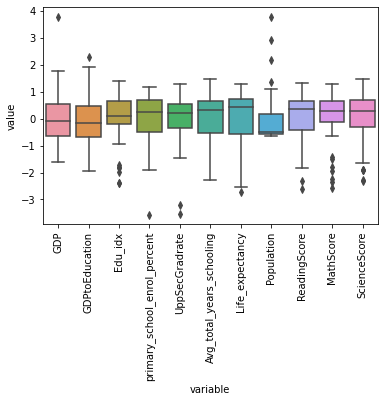

In [190]:
sns.boxplot(x="variable", y="value", data=pd.melt(norm_all))
plt.xticks(rotation = 90)
plt.show()

In [191]:
norm_all.head()

,GDP,GDPtoEducation,Edu_idx,primary_school_enrol_percent,UppSecGradrate,Avg_total_years_schooling,Life_expectancy,Population,ReadingScore,MathScore,ScienceScore
0,0.461150,0.096292,1.400365,0.360471,0.468825,0.721004,0.957634,-0.323598,0.582581,0.353402,0.709735
1,0.668590,0.213222,-0.148459,-1.921737,0.209174,0.317635,0.463019,-0.534616,0.037485,0.428154,0.292742
2,0.457529,1.013888,0.060437,0.655770,-3.525476,0.087139,0.397663,-0.498522,0.461449,0.677329,0.487339
3,-1.354228,0.844491,-1.710429,-0.252159,-1.308952,-2.275449,-1.435664,2.174077,-2.324600,-2.561937,-2.320411
4,0.368763,-0.143451,0.506224,1.069808,0.622864,0.893876,0.721986,-0.156270,1.309376,0.901585,1.210126


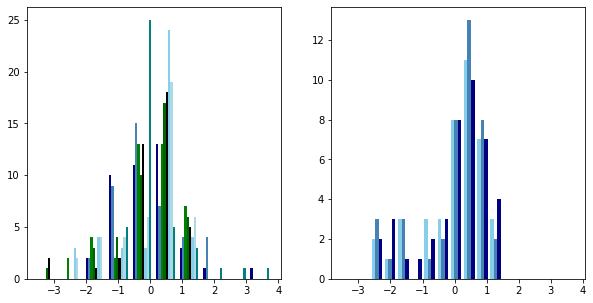

In [192]:
colors=['navy','steelblue','green','darkgreen','k','skyblue','lightblue','teal']
colors2=['skyblue','steelblue','navy']
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(10,5),sharex=True)
ax1.hist(normalized_df,bins=10, label='Value',color=colors)
ax2.hist(norm_pisa,bins=10,color=colors2);
#red_patch = mpatches.Patch(color='darkred', label='Reading score')
##blue_patch = mpatches.Patch(color='navy', label='Math score')
#green_patch = mpatches.Patch(color='olive', label='Science score')
#plt.legend(handles=[red_patch,blue_patch,green_patch])

In [193]:
merg_c=merged_total1.copy()

<h3>Clusters</h3>

In [194]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(norm_all)
y_kmeans = kmeans.predict(norm_all)

In [195]:
from sklearn.cluster import KMeans

#computing K-Means with K = 3 (3 clusters)
kmeansModel = KMeans(init='random', n_clusters=3, n_init=10)
kmeansModel.fit_predict(norm_all)
clusterLabels = kmeansModel.labels_

In [196]:
merg_c['Cluster'] = pd.Series(clusterLabels, index=merged_total1.index)

In [197]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [198]:
silhouette_avg = silhouette_score(norm_all, clusterLabels)
print(silhouette_avg)

0.23378815548656492


In [199]:
sse = []
list_k = list(range(1, 6))

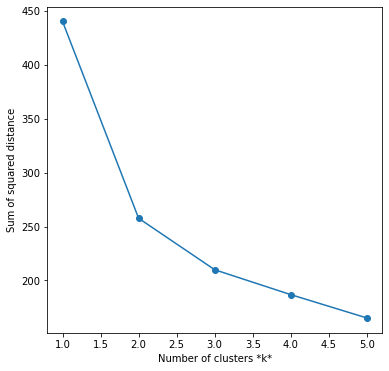

In [200]:
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(norm_all)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [201]:
sample_silhouette_values = silhouette_samples(norm_all, clusterLabels)

In [202]:
merg_c[merg_c['Cluster']==0]

,Country,Code,GDP,GDPtoEducation,Edu_idx,primary_school_enrol_percent,UppSecGradrate,Avg_total_years_schooling,Life_expectancy,Population,ReadingScore,MathScore,ScienceScore,Cluster
3,Brazil,BRA,14744.112913,6.241060,0.661306,94.730550,60.439000,7.6,74.994,204472000,407.0,377.0,401.0,0
7,Colombia,COL,13265.797257,4.470390,0.602222,91.936300,71.649889,8.1,76.531,47521000,425.0,390.0,416.0,0
8,Costa Rica,CRI,16586.353032,7.082540,0.653922,97.607830,35.111083,8.8,79.565,4848000,426.0,402.0,416.0,0
19,Indonesia,IDN,10247.206378,3.583600,0.603136,92.975568,72.510667,7.9,70.768,258383008,397.0,386.0,403.0,0
29,Mexico,MEX,18284.882844,5.235240,0.637833,96.073430,58.635083,8.6,74.904,121858000,423.0,408.0,416.0,0
39,Turkey,TUR,25625.574634,2.763303,0.652024,94.631880,71.302167,7.8,76.532,78529000,428.0,420.0,425.0,0


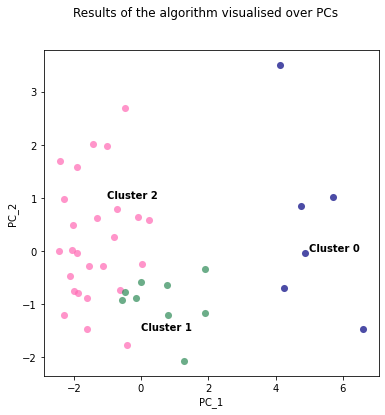

In [203]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(norm_all)

projectedAxes = pca.transform(norm_all)
projectedAxes=pd.DataFrame(projectedAxes) #put into a dataframe so easier to filter

plt.figure(1,figsize=(6,6))
plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
#draw 3 scatterplots on top of each other, using a different colour for each
plt.scatter(projectedAxes[clusterLabels==0][0], projectedAxes[clusterLabels==0][1], c = "navy", s = 50, alpha = 0.7, linewidth=0) # greenish
plt.scatter(projectedAxes[clusterLabels==1][0], projectedAxes[clusterLabels==1][1], c = "hotpink", s = 50, alpha = 0.7, linewidth=0) # orangish
plt.scatter(projectedAxes[clusterLabels==2][0], projectedAxes[clusterLabels==2][1], c = "seagreen", s = 50, alpha = 0.7, linewidth=0)
plt.scatter(projectedAxes[clusterLabels==3][0], projectedAxes[clusterLabels==3][1], c = "hotpink", s = 50, alpha = 0.7, linewidth=0)
plt.text(5, 0, "Cluster 0", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(0, -1.5, "Cluster 1", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-1, 1, "Cluster 2", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

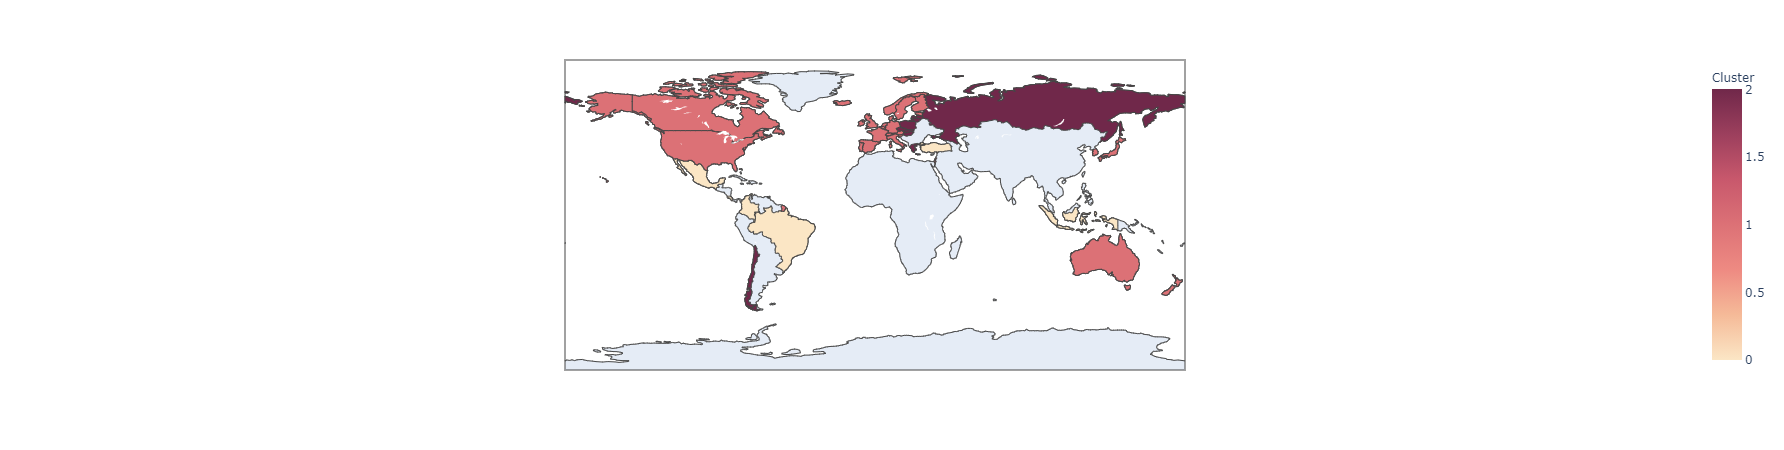

In [204]:
fig = px.choropleth(merg_c, locations="Code",
                    hover_name="Country",
                    color='Cluster',
                    color_continuous_scale=px.colors.sequential.Burgyl,
                   )
fig.show()

In [205]:
merg_c.dtypes

Country                          object
Code                             object
GDP                             float64
GDPtoEducation                  float64
Edu_idx                         float64
primary_school_enrol_percent    float64
UppSecGradrate                  float64
Avg_total_years_schooling       float64
Life_expectancy                 float64
Population                        int64
ReadingScore                    float64
MathScore                       float64
ScienceScore                    float64
Cluster                           int32
dtype: object

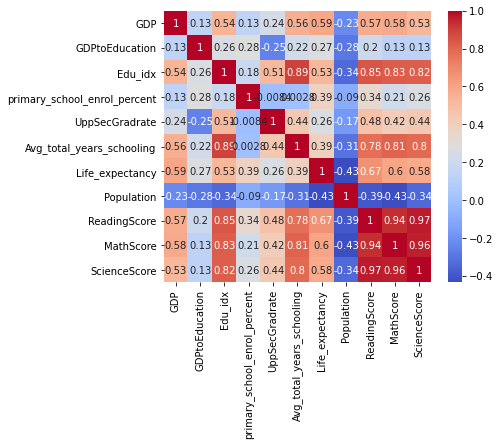

In [206]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(norm_all.corr(), annot=True,cmap='coolwarm');

In [207]:
clust0=merg_c[merg_c['Cluster']==0]
clust1=merg_c[merg_c['Cluster']==1]
clust2=merg_c[merg_c['Cluster']==2]
clust3=merg_c[merg_c['Cluster']==3]

In [208]:
clust0countries=clust0['Code'].unique()
clust1countries=clust1['Code'].unique()
clust2countries=clust2['Code'].unique()
clust3countries=clust3['Code'].unique()

In [209]:
clust0g=df_all_girl[df_all_girl['Country'].isin(clust0countries)]
clust1g=df_all_girl[df_all_girl['Country'].isin(clust1countries)]
clust2g=df_all_girl[df_all_girl['Country'].isin(clust2countries)]
clust3g=df_all_girl[df_all_girl['Country'].isin(clust3countries)]


clust0b=df_all_boy[df_all_boy['Country'].isin(clust0countries)]
clust1b=df_all_boy[df_all_boy['Country'].isin(clust1countries)]
clust2b=df_all_boy[df_all_boy['Country'].isin(clust2countries)]
clust3b=df_all_boy[df_all_boy['Country'].isin(clust3countries)]

In [210]:
merg0=pd.concat([clust0g,clust0b])

In [211]:
col = merg0.loc[: , "ReadingScore":"ScienceScore"]
merg0['AvgScore']=col.mean(axis=1)

In [212]:
clust0all=df_all_total[df_all_total['Code'].isin(clust0countries)]
clust1all=df_all_total[df_all_total['Code'].isin(clust1countries)]
clust2all=df_all_total[df_all_total['Code'].isin(clust2countries)]
clust3all=df_all_total[df_all_total['Code'].isin(clust3countries)]
clust0all['Cluster']="0"
clust1all['Cluster']="1"
clust2all['Cluster']="2"
clust3all['Cluster']="3"

<ipython-input-212-22b0e60041a2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-212-22b0e60041a2>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-212-22b0e60041a2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
clustersconc=pd.concat([clust0all,clust1all,clust2all,clust3all])

In [214]:
col = clustersconc.loc[: , "ReadingScore":"ScienceScore"]
clustersconc['AvgScore']=col.mean(axis=1)

<AxesSubplot:xlabel='Year', ylabel='AvgScore'>

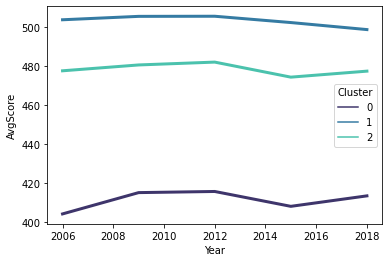

In [215]:
colors=['red','blue','green','orange']
sns.lineplot(x='Year',y='AvgScore',data=clustersconc,hue='Cluster',ci=None,palette='mako',linewidth=3)

In [216]:
a=merg_c[['ReadingScore','Cluster']]
b=merg_c[['MathScore','Cluster']]
c=merg_c[['ScienceScore','Cluster']]

In [217]:
a['Name']="Reading"
b['Name']="Math"
c["Name"]="Science"

<ipython-input-217-cc7ed440fcfc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-cc7ed440fcfc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-cc7ed440fcfc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
a.rename(columns={'ReadingScore':'Score'},inplace=True)
b.rename(columns={'MathScore':'Score'},inplace=True)
c.rename(columns={'ScienceScore':'Score'},inplace=True)

C:\Users\Suvi\anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [219]:
conc_merg=pd.concat([a,b,c])

In [220]:
conc_merg.sort_values('Cluster',inplace=True)

In [221]:
conc_merg[conc_merg['Cluster']==1].mean()

Score      502.307692
Cluster      1.000000
dtype: float64

<AxesSubplot:xlabel='Name', ylabel='Score'>

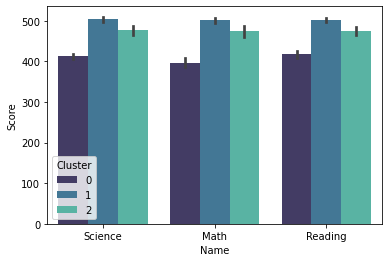

In [222]:
sns.barplot(x='Name',y='Score',hue='Cluster',data=conc_merg,palette='mako')

In [223]:
conc_merg.head()

,Score,Cluster,Name
7,416.0,0,Science
8,402.0,0,Math
7,390.0,0,Math
29,408.0,0,Math
3,377.0,0,Math


<h3>Girls vs boys</h3>

In [252]:
pisa_girl_boy=pd.concat([df_all_boy,df_all_girl])

In [253]:
pisa_girl2015=df_all_girl[df_all_girl['Year']==2015]
pisa_boy2015=df_all_boy[df_all_boy['Year']==2015]

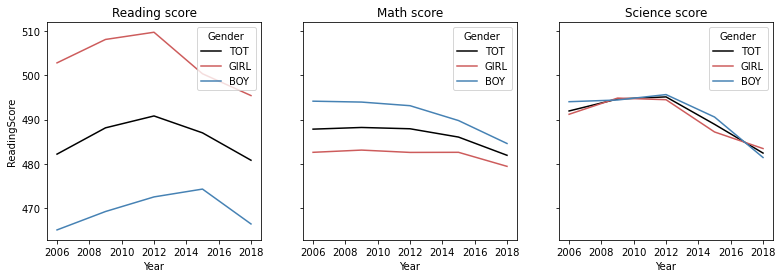

In [254]:
fig, axes = plt.subplots(1, 3, sharex=True,sharey=True, figsize=(13,4))
sns.set_palette(['black','indianred','steelblue'])
sns.lineplot(ax=axes[0],x='Year',y='ReadingScore',hue='Gender',data=df_all, ci=None)
axes[0].set_title("Reading score")

sns.lineplot(ax=axes[1],x='Year',y='MathScore',hue='Gender',data=df_all,ci=None)
axes[1].set_title("Math score")

sns.lineplot(ax=axes[2],x='Year',y='ScienceScore',hue='Gender',data=df_all,ci=None)
axes[2].set_title("Science score");

In [278]:
pisa_girl_boy2015=pisa_girl_boy[pisa_girl_boy['Year']==2015]

In [279]:
mergedboygirl2015=pisa_girl2015.merge(pisa_boy2015,on=['Country'],how='inner')

In [280]:
mergedboygirl2015.head()

,Country,Gender_x,Year_x,ReadingScore_x,MathScore_x,ScienceScore_x,Gender_y,Year_y,ReadingScore_y,MathScore_y,ScienceScore_y
0,AUS,GIRL,2015,519.0,491.0,509.0,BOY,2015,487.0,497.0,511.0
1,AUT,GIRL,2015,495.0,483.0,486.0,BOY,2015,475.0,510.0,504.0
2,BEL,GIRL,2015,507.0,500.0,496.0,BOY,2015,491.0,514.0,508.0
3,BRA,GIRL,2015,419.0,370.0,399.0,BOY,2015,395.0,385.0,403.0
4,CAN,GIRL,2015,540.0,511.0,527.0,BOY,2015,514.0,520.0,528.0


In [281]:
mergedboygirl2015['ReadDifference']=mergedboygirl2015['ReadingScore_x']-mergedboygirl2015['ReadingScore_y']
mergedboygirl2015['MathDifference']=mergedboygirl2015['MathScore_x']-mergedboygirl2015['MathScore_y']
mergedboygirl2015['ScienceDifference']=mergedboygirl2015['ScienceScore_x']-mergedboygirl2015['ScienceScore_y']

In [282]:
mergedboygirl2015.drop(columns=['Gender_x', 'Year_x', 'ReadingScore_x', 'MathScore_x',
       'ScienceScore_x', 'Gender_y', 'Year_y', 'ReadingScore_y', 'MathScore_y',
       'ScienceScore_y'],inplace=True)

In [283]:
mergedboygirl2015.sort_values(by=['ReadDifference'],ascending=False,inplace=True)

In [284]:
mergedboygirl2015['ReadDiff'] = np.where(mergedboygirl2015['ReadDifference'] > 0, 'Girl', 'Boy')
mergedboygirl2015['MathDiff'] = np.where(mergedboygirl2015['MathDifference'] > 0, 'Girl', 'Boy')
mergedboygirl2015['ScienceDiff'] = np.where(mergedboygirl2015['ScienceDifference'] > 0, 'Girl', 'Boy')

In [285]:
mergedboygirl2015.rename(columns={'Country':'Code'},inplace=True)

In [286]:
mergedboygirl2015=mergedboygirl2015.merge(countryCodes,on='Code')

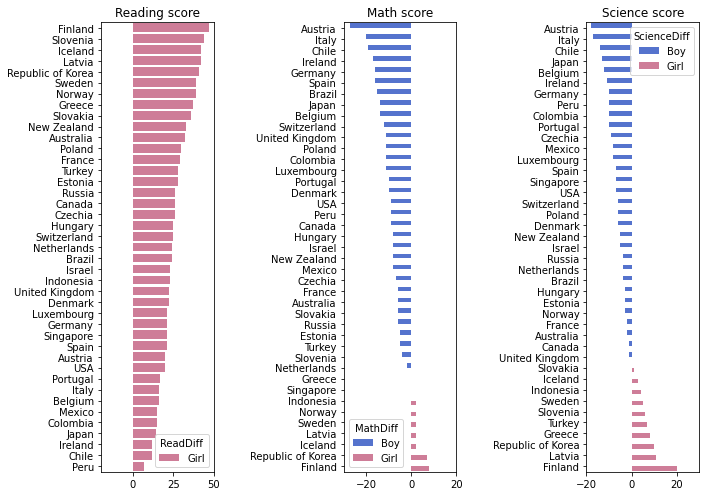

In [287]:
fig, axes = plt.subplots(1, 3, figsize=(10,7))
colors=['palevioletred','royalblue']
colors_r=['royalblue','palevioletred']
mergedboygirl2015.sort_values(by=['ReadDifference'],ascending=False,inplace=True)
sns.barplot(ax=axes[0], x='ReadDifference', y='Country',data=mergedboygirl2015,hue='ReadDiff',palette=colors,orient='h')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_xlim(-20,50)

mergedboygirl2015.sort_values(by=['MathDifference'],ascending=True,inplace=True)
sns.barplot(ax=axes[1], y='Country',x='MathDifference',data=mergedboygirl2015,hue='MathDiff',palette=colors_r,orient='h')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_xlim(-30,20)

mergedboygirl2015.sort_values(by=['ScienceDifference'],ascending=True,inplace=True)
sns.barplot(ax=axes[2], y='Country',x='ScienceDifference',data=mergedboygirl2015,hue='ScienceDiff',palette=colors_r,orient='h');
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[2].set_xlim(-20,30)

axes[0].set_title('Reading score')
axes[1].set_title('Math score')
axes[2].set_title('Science score')
#axes[0].tick_params(labelrotation=90)
#axes[1].tick_params(labelrotation=90)
#axes[2].tick_params(labelrotation=90)
plt.tight_layout(w_pad=3)

In [265]:
#mergedboygirl2015=mergedboygirl2015.rename(columns={'Code':'Country'})
#mergedboygirl2015=mergedboygirl2015.rename(columns={'Country':'Code'})

In [288]:
mergedboygirl2015

,Code,ReadDifference,MathDifference,ScienceDifference,ReadDiff,MathDiff,ScienceDiff,Country
31,AUT,20.0,-27.0,-18.0,Girl,Boy,Boy,Austria
33,ITA,16.0,-20.0,-17.0,Girl,Boy,Boy,Italy
39,CHL,12.0,-19.0,-14.0,Girl,Boy,Boy,Chile
37,JPN,14.0,-14.0,-13.0,Girl,Boy,Boy,Japan
34,BEL,16.0,-14.0,-12.0,Girl,Boy,Boy,Belgium
38,IRL,12.0,-17.0,-11.0,Girl,Boy,Boy,Ireland
27,DEU,21.0,-16.0,-10.0,Girl,Boy,Boy,Germany
40,PER,7.0,-9.0,-10.0,Girl,Boy,Boy,Peru
36,COL,15.0,-11.0,-10.0,Girl,Boy,Boy,Colombia
32,PRT,17.0,-10.0,-10.0,Girl,Boy,Boy,Portugal


In [289]:
merg_new=merg_c.merge(mergedboygirl2015,on='Code')

In [290]:
merg_clust0=merg_new[merg_new['Cluster']==0]
merg_clust1=merg_new[merg_new['Cluster']==1]
merg_clust2=merg_new[merg_new['Cluster']==2]

In [291]:
merg_new.columns

Index(['Country_x', 'Code', 'GDP', 'GDPtoEducation', 'Edu_idx',
       'primary_school_enrol_percent', 'UppSecGradrate',
       'Avg_total_years_schooling', 'Life_expectancy', 'Population',
       'ReadingScore', 'MathScore', 'ScienceScore', 'Cluster',
       'ReadDifference', 'MathDifference', 'ScienceDifference', 'ReadDiff',
       'MathDiff', 'ScienceDiff', 'Country_y'],
      dtype='object')

In [292]:
merg_new=merg_new.drop(columns=

['GDP', 'GDPtoEducation', 'Edu_idx',
       'primary_school_enrol_percent', 'UppSecGradrate',
       'Avg_total_years_schooling', 'Life_expectancy', 'Population',])



In [293]:
#merg_new[['ReadDifference','MathDifference','ScienceDifference']]=merg_new[['ReadDifference','MathDifference','ScienceDifference']].abs()

In [294]:
merg_new['DiffpercR']=merg_new['ReadDifference']/merg_new['ReadingScore']*100
merg_new['DiffpercM']=merg_new['MathDifference']/merg_new['MathScore']*100
merg_new['DiffpercS']=merg_new['ScienceDifference']/merg_new['ScienceScore']*100

In [295]:
merg_new

,Country_x,Code,ReadingScore,MathScore,ScienceScore,Cluster,ReadDifference,MathDifference,ScienceDifference,ReadDiff,MathDiff,ScienceDiff,Country_y,DiffpercR,DiffpercM,DiffpercS
0,Australia,AUS,503.00,494.0,510.00,1,32.0,-6.0,-2.0,Girl,Boy,Boy,Australia,6.361829,-1.214575,-0.392157
1,Austria,AUT,485.00,497.0,495.00,1,20.0,-27.0,-18.0,Girl,Boy,Boy,Austria,4.123711,-5.432596,-3.636364
2,Belgium,BEL,499.00,507.0,502.00,1,16.0,-14.0,-12.0,Girl,Boy,Boy,Belgium,3.206413,-2.761341,-2.390438
3,Brazil,BRA,407.00,377.0,401.00,0,24.0,-15.0,-4.0,Girl,Boy,Boy,Brazil,5.896806,-3.978780,-0.997506
4,Canada,CAN,527.00,516.0,528.00,1,26.0,-9.0,-1.0,Girl,Boy,Boy,Canada,4.933586,-1.744186,-0.189394
5,Switzerland,CHE,492.00,521.0,506.00,1,25.0,-12.0,-6.0,Girl,Boy,Boy,Switzerland,5.081301,-2.303263,-1.185771
6,Chile,CHL,459.00,423.0,447.00,2,12.0,-19.0,-14.0,Girl,Boy,Boy,Chile,2.614379,-4.491726,-3.131991
7,Colombia,COL,425.00,390.0,416.00,0,15.0,-11.0,-10.0,Girl,Boy,Boy,Colombia,3.529412,-2.820513,-2.403846
8,Czech Republic,CZE,487.00,492.0,493.00,2,26.0,-7.0,-9.0,Girl,Boy,Boy,Czechia,5.338809,-1.422764,-1.825558
9,Germany,DEU,509.00,506.0,509.00,1,21.0,-16.0,-10.0,Girl,Boy,Boy,Germany,4.125737,-3.162055,-1.964637


In [296]:
merg_new['Score']=merg_new['ReadDifference']+merg_new['MathDifference']+merg_new['ScienceDifference']

In [297]:
merg_new['ScoreGen'] = np.where(merg_new['Score'] > 0, 'Girl', 'Boy')

In [298]:
#pisa_concatnew=pisa_girl2015.merge(pisa_boy2015,on='Code')

In [299]:
merg_new[merg_new['Cluster']==0]

,Country_x,Code,ReadingScore,MathScore,ScienceScore,Cluster,ReadDifference,MathDifference,ScienceDifference,ReadDiff,MathDiff,ScienceDiff,Country_y,DiffpercR,DiffpercM,DiffpercS,Score,ScoreGen
3,Brazil,BRA,407.0,377.0,401.0,0,24.0,-15.0,-4.0,Girl,Boy,Boy,Brazil,5.896806,-3.978780,-0.997506,5.0,Girl
7,Colombia,COL,425.0,390.0,416.0,0,15.0,-11.0,-10.0,Girl,Boy,Boy,Colombia,3.529412,-2.820513,-2.403846,-6.0,Boy
18,Indonesia,IDN,397.0,386.0,403.0,0,23.0,2.0,4.0,Girl,Girl,Girl,Indonesia,5.793451,0.518135,0.992556,29.0,Girl
27,Mexico,MEX,423.0,408.0,416.0,0,15.0,-8.0,-8.0,Girl,Boy,Boy,Mexico,3.546099,-1.960784,-1.923077,-1.0,Boy
37,Turkey,TUR,428.0,420.0,425.0,0,28.0,-5.0,7.0,Girl,Boy,Girl,Turkey,6.542056,-1.190476,1.647059,30.0,Girl


In [300]:
merg_new.head()

,Country_x,Code,ReadingScore,MathScore,ScienceScore,Cluster,ReadDifference,MathDifference,ScienceDifference,ReadDiff,MathDiff,ScienceDiff,Country_y,DiffpercR,DiffpercM,DiffpercS,Score,ScoreGen
0,Australia,AUS,503.0,494.0,510.0,1,32.0,-6.0,-2.0,Girl,Boy,Boy,Australia,6.361829,-1.214575,-0.392157,24.0,Girl
1,Austria,AUT,485.0,497.0,495.0,1,20.0,-27.0,-18.0,Girl,Boy,Boy,Austria,4.123711,-5.432596,-3.636364,-25.0,Boy
2,Belgium,BEL,499.0,507.0,502.0,1,16.0,-14.0,-12.0,Girl,Boy,Boy,Belgium,3.206413,-2.761341,-2.390438,-10.0,Boy
3,Brazil,BRA,407.0,377.0,401.0,0,24.0,-15.0,-4.0,Girl,Boy,Boy,Brazil,5.896806,-3.978780,-0.997506,5.0,Girl
4,Canada,CAN,527.0,516.0,528.0,1,26.0,-9.0,-1.0,Girl,Boy,Boy,Canada,4.933586,-1.744186,-0.189394,16.0,Girl


<AxesSubplot:xlabel='Cluster', ylabel='Score'>

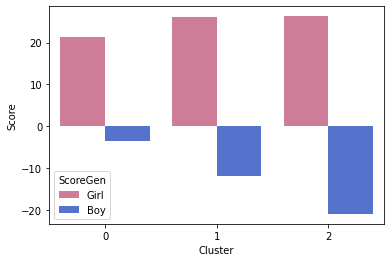

In [301]:
colors=['palevioletred','royalblue']
sns.barplot(x='Cluster',y='Score', data= merg_new,hue='ScoreGen', ci=None,palette=colors)

In [305]:
clusters=merg_new[['Code','Cluster']]
countries=merg_new[['Code','Country_x']]

In [306]:
girl_df=pisa_girl2015.copy()
boy_df=pisa_boy2015.copy()

In [307]:
girl_df.head()

,Country,Gender,Year,ReadingScore,MathScore,ScienceScore
6,AUS,GIRL,2015,519.0,491.0,509.0
15,AUT,GIRL,2015,495.0,483.0,486.0
32,BEL,GIRL,2015,507.0,500.0,496.0
49,BRA,GIRL,2015,419.0,370.0,399.0
57,CAN,GIRL,2015,540.0,511.0,527.0


In [308]:
girl_df=girl_df.rename(columns={'Country':'Code'})
boy_df=boy_df.rename(columns={'Country':'Code'})

In [309]:
girl_df=girl_df.merge(clusters,on='Code',how='inner')
boy_df=boy_df.merge(clusters,on='Code',how='inner')

In [310]:
girl_df=girl_df.groupby('Cluster',as_index=True)[['ReadingScore', 'MathScore','ScienceScore']].mean()
boy_df=boy_df.groupby('Cluster',as_index=True)[['ReadingScore', 'MathScore','ScienceScore']].mean()

In [311]:
girl_df['Girl'] = girl_df.mean(numeric_only=True, axis=1)
boy_df['Boy'] = boy_df.mean(numeric_only=True, axis=1)

In [312]:
both_df=boy_df.merge(girl_df,left_index=True, right_index=True)

In [313]:
both_df=both_df.drop(columns=['ReadingScore_x','MathScore_x','ScienceScore_x','ReadingScore_y','MathScore_y','ScienceScore_y'])

In [314]:
both_df.head()

,Boy,Girl
Cluster,,
0,406.333333,410.133333
1,499.974359,504.756410
2,473.125000,479.916667


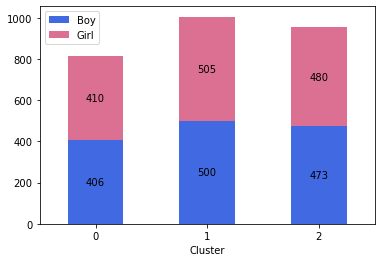

In [315]:
ax = both_df.plot.bar(stacked=True,color=['royalblue','palevioletred'])
ax.tick_params(labelrotation=0)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

In [316]:
df_concat2015=df_concat2015.rename(columns={'Country':'Code'})

In [317]:
df_concat2015=df_concat2015.merge(countryCodes,on='Code')

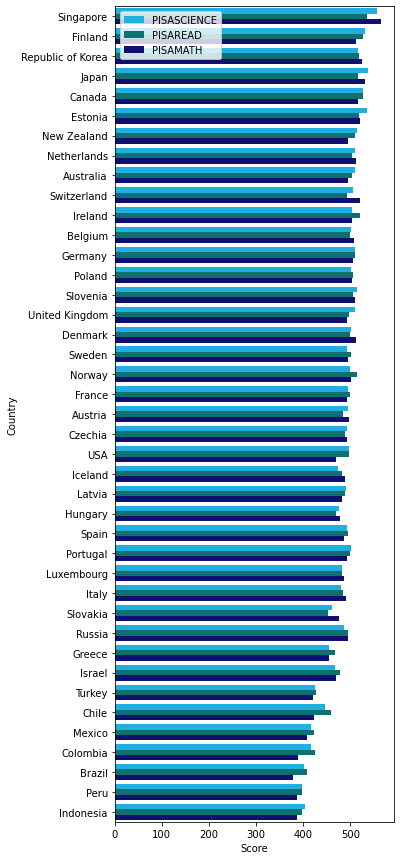

In [318]:
plt.figure(figsize=(5,15))
colors = ["deepskyblue","teal","navy"]
sns.barplot(x='Score',y='Country',data=df_concat2015,hue='INDICATOR',palette=colors,orient = 'h',ci=None)
plt.legend(loc=2);